# First Step: Import Libraries and Dataset

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('once')

# Second Step: Analyze and adjust the data

In [167]:
cab_data = pd.read_csv(r"C:\Users\Mayra\Documents\Data analysis internship\week 2\DataSets-main\Cab_Data.csv")
cab_data["Date of Travel"] = pd.to_datetime(cab_data["Date of Travel"],unit = "D",origin = "1899-12-30")
cab_data.drop_duplicates(keep="first")
cab_data.dropna(how="all")
cab_data.head(10)



,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [168]:
cab_data["Year"] = cab_data["Date of Travel"].dt.year
cab_data["Month"] = cab_data["Date of Travel"].dt.month
cab_data["Day"] = cab_data["Date of Travel"].dt.day
cab_data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,8
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,6
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,2


In [169]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Year            359392 non-null  int64         
 8   Month           359392 non-null  int64         
 9   Day             359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 27.4+ MB


In [170]:
cab_data.dtypes


Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
Year                       int64
Month                      int64
Day                        int64
dtype: object

In [171]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,2017.045199,7.500434,15.628447
std,1.268058e+05,12.233526,274.378911,157.993661,0.800239,3.445095,8.827151
min,1.000001e+07,1.900000,15.600000,19.000000,2016.000000,1.000000,1.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2016.000000,5.000000,8.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,2017.000000,8.000000,16.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,2018.000000,10.000000,23.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,2018.000000,12.000000,31.000000


In [172]:

cab_data["City"].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [173]:
cab_data["Company"].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [174]:
cab_data["City"].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [175]:
city_data=pd.read_csv(r"C:\Users\Mayra\Documents\Data analysis internship\week 2\DataSets-main\City.csv")
city_data["Population"] = city_data["Population"].apply(lambda x: x.replace(',', ''))
city_data["Population"].apply(lambda x: int(x))
city_data["Users"] =city_data["Users"].apply(lambda x: x.replace(',', ''))
city_data["Population"].apply(lambda x: int(x))
city_data.drop_duplicates(keep="first")


,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [176]:
city_data.dtypes

City          object
Population    object
Users         object
dtype: object

In [177]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [178]:
city_data.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,TUCSON AZ,671238,164468
freq,1,1,1


In [179]:
city_data["Population"] = city_data["Population"].astype(float)
city_data["Users"] = city_data["Users"].astype(float)

In [180]:
city_data.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [181]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [182]:
city_data.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [183]:
customer_id=pd.read_csv(r"C:\Users\Mayra\Documents\Data analysis internship\week 2\DataSets-main\Customer_ID.csv")
customer_id.drop_duplicates(keep="first")
customer_id.head(20)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [184]:
customer_id["Gender"].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

In [185]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [186]:
customer_id.describe( include = "all")

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


In [187]:
customer_id["Income (USD/Month)"].value_counts()

8497     11
16512    10
8756     10
21804     9
8580      9
         ..
10888     1
23174     1
6766      1
2668      1
12074     1
Name: Income (USD/Month), Length: 23341, dtype: int64

In [188]:
transaction_id=pd.read_csv(r"C:\Users\Mayra\Documents\Data analysis internship\week 2\DataSets-main\Transaction_ID.csv")
transaction_id.drop_duplicates(keep="first")
transaction_id.head(4)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash


In [189]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [190]:
transaction_id["Payment_Mode"].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [261]:
# adding the holiday csv and previewing it 
holidays = pd.read_csv(r"C:\Users\Mayra\Documents\Data analysis internship\week 2\Holidays.csv")

holidays.head()

,Date,Holidays
0,2016-02-15,Presidents Day (Washingtons Birthday)
1,2016-05-30,Memorial Day
2,2016-07-04,Independence Day
3,2016-09-05,Labor Day
4,2016-10-10,Columbus Day


In [236]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      70 non-null     object
 1   Holidays  70 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [237]:
holidays.describe( include = "all")

,Date,Holidays
count,70,70
unique,70,11
top,2014-10-13,Memorial Day
freq,1,7


In [249]:
holidays["Year"] = holidays["Date"].dt.year
holidays["Month"] = holidays["Date"].dt.month
holidays["Day"] = holidays["Datel"].dt.day
holidays.head(3)

AttributeError: Can only use .dt accessor with datetimelike values

# Merged Data and Adding Columns

In [191]:
#add a column named "Profit" to determine which company has better profit
cab_data["Profit"]=(cab_data["Price Charged"]-cab_data["Cost of Trip"])
cab_data.head(4)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,8,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,6,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,2,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,7,25.798


In [192]:
#add a column named "Margin" to determine which company has better Margin
cab_data["Margin"]=(cab_data["Price Charged"]-cab_data["Cost of Trip"])/(cab_data["Price Charged"])
cab_data.head(4)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Profit,Margin
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,8,57.315,0.154509
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,6,23.666,0.066010
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,2,27.568,0.220192
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,7,25.798,0.068357


In [ ]:
holiday_merged= cab_data.merge(transaction_id, on= "Transaction ID").merge(customer_id, on ="Customer ID").merge(city_data, on = "City")
holiday_merged.head(2)

In [246]:
merged= cab_data.merge(transaction_id, on= "Transaction ID").merge(customer_id, on ="Customer ID").merge(city_data, on = "City")
merged.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,...,Margin,Profit per KM,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Performance per city
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,8,...,0.154509,1.882266,29290,Card,Male,28,10813,814885.0,24701.0,3.031225
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,21,...,0.469813,10.739870,29290,Cash,Male,28,10813,814885.0,24701.0,3.031225


In [194]:
#add a column named "Profit per km" to determine which company is better per km profit
cab_data["Profit per KM"]=(cab_data["Price Charged"]-cab_data["Cost of Trip"])/(cab_data["KM Travelled"])
cab_data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Profit,Margin,Profit per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,8,57.315,0.154509,1.882266
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,6,23.666,0.066010,0.826904
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,2,27.568,0.220192,3.049558


In [195]:
cab_data["Profit per KM"].value_counts()


2.500000     8
2.600000     5
2.300000     5
2.375000     5
1.000000     5
            ..
15.400601    1
4.127727     1
1.612020     1
3.395124     1
1.758726     1
Name: Profit per KM, Length: 356133, dtype: int64

In [196]:
pinkcab=cab_data.loc[cab_data["Company"]=="Pink Cab","Profit per KM"].mean()
yellowcab=cab_data.loc[cab_data["Company"]=="Yellow Cab","Profit per KM"].mean()
strpc=str(pinkcab)
stryc=str(yellowcab)
print("Average Profit for KM for Pink Cab is "+ strpc," ","Average Profit for KM for Yellow Cab is "+ stryc)


Average Profit for KM for Pink Cab is 2.7699077003965247   Average Profit for KM for Yellow Cab is 7.105507808353063


In [197]:
#add a column named "Performance per city" to determine which company is preferred in different cities
city_data["Performance per city"]=(city_data["Users"]*100/(city_data["Population"]))
city_data.head(20)

,City,Population,Users,Performance per city
0,NEW YORK NY,8405837.0,302149.0,3.594514
1,CHICAGO IL,1955130.0,164468.0,8.412126
2,LOS ANGELES CA,1595037.0,144132.0,9.036279
3,MIAMI FL,1339155.0,17675.0,1.319862
4,SILICON VALLEY,1177609.0,27247.0,2.313756
5,ORANGE COUNTY,1030185.0,12994.0,1.261327
6,SAN DIEGO CA,959307.0,69995.0,7.296413
7,PHOENIX AZ,943999.0,6133.0,0.649683
8,DALLAS TX,942908.0,22157.0,2.349858
9,ATLANTA GA,814885.0,24701.0,3.031225


In [198]:
cab_data["Date of Travel"].value_counts()

2018-01-05    2022
2017-12-15    1123
2017-12-08    1100
2018-12-15    1086
2017-11-24    1085
              ... 
2016-01-19      88
2016-01-12      86
2016-01-11      85
2016-01-05      47
2016-01-04      25
Name: Date of Travel, Length: 1095, dtype: int64

In [ ]:
# Creating the series
holiday_season = df_final.groupby(['Name_Holiday', "Company"])['Users'].sum()
holiday_season

# Graphics

In [199]:
from random import randint

colors = []
n = 16

for i in range(n):
    colors.append("#%06X" % randint(0, 0xFFFFFF))
    

In [200]:
performance = city_data["Performance per city"]
city = city_data["City"]

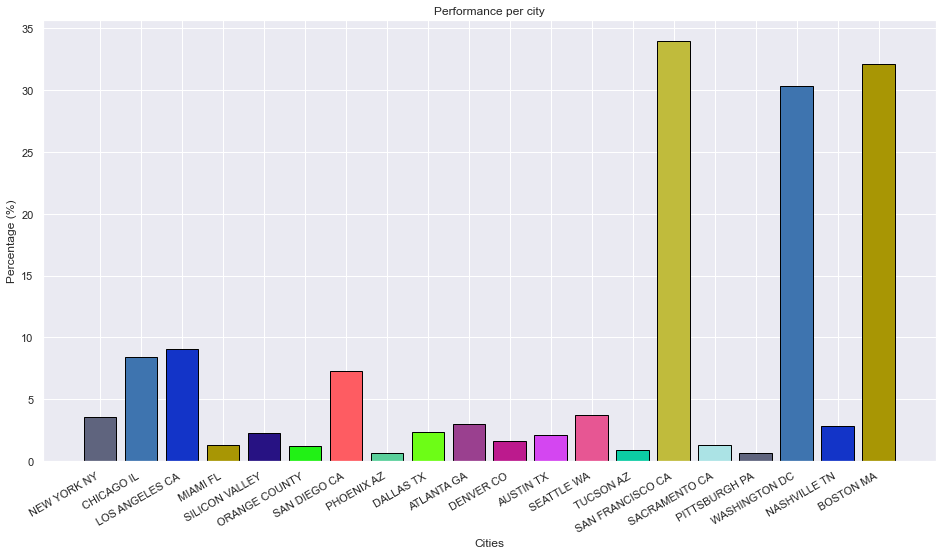

In [201]:
plt.figure(figsize = (16, 9))
plt.bar(city, performance, edgecolor='black', color = colors)
plt.gcf().autofmt_xdate()
plt.title('Performance per city')
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.show()

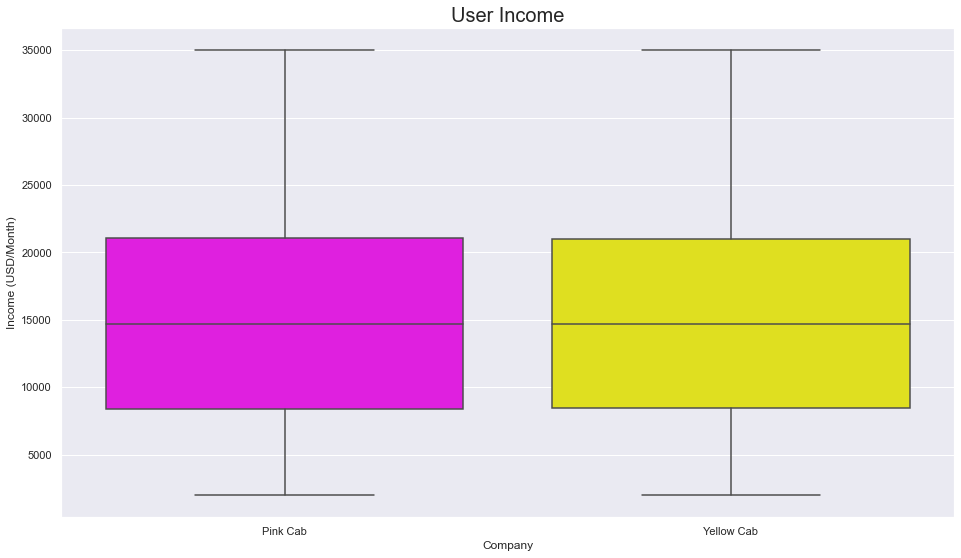

In [202]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))

sns.boxplot(merged['Company'], merged['Income (USD/Month)'],palette=['magenta', 'yellow'])
plt.title('User Income', fontsize=20)
plt.show()

C:\Users\Mayra\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Mayra\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Mayra\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Mayra\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


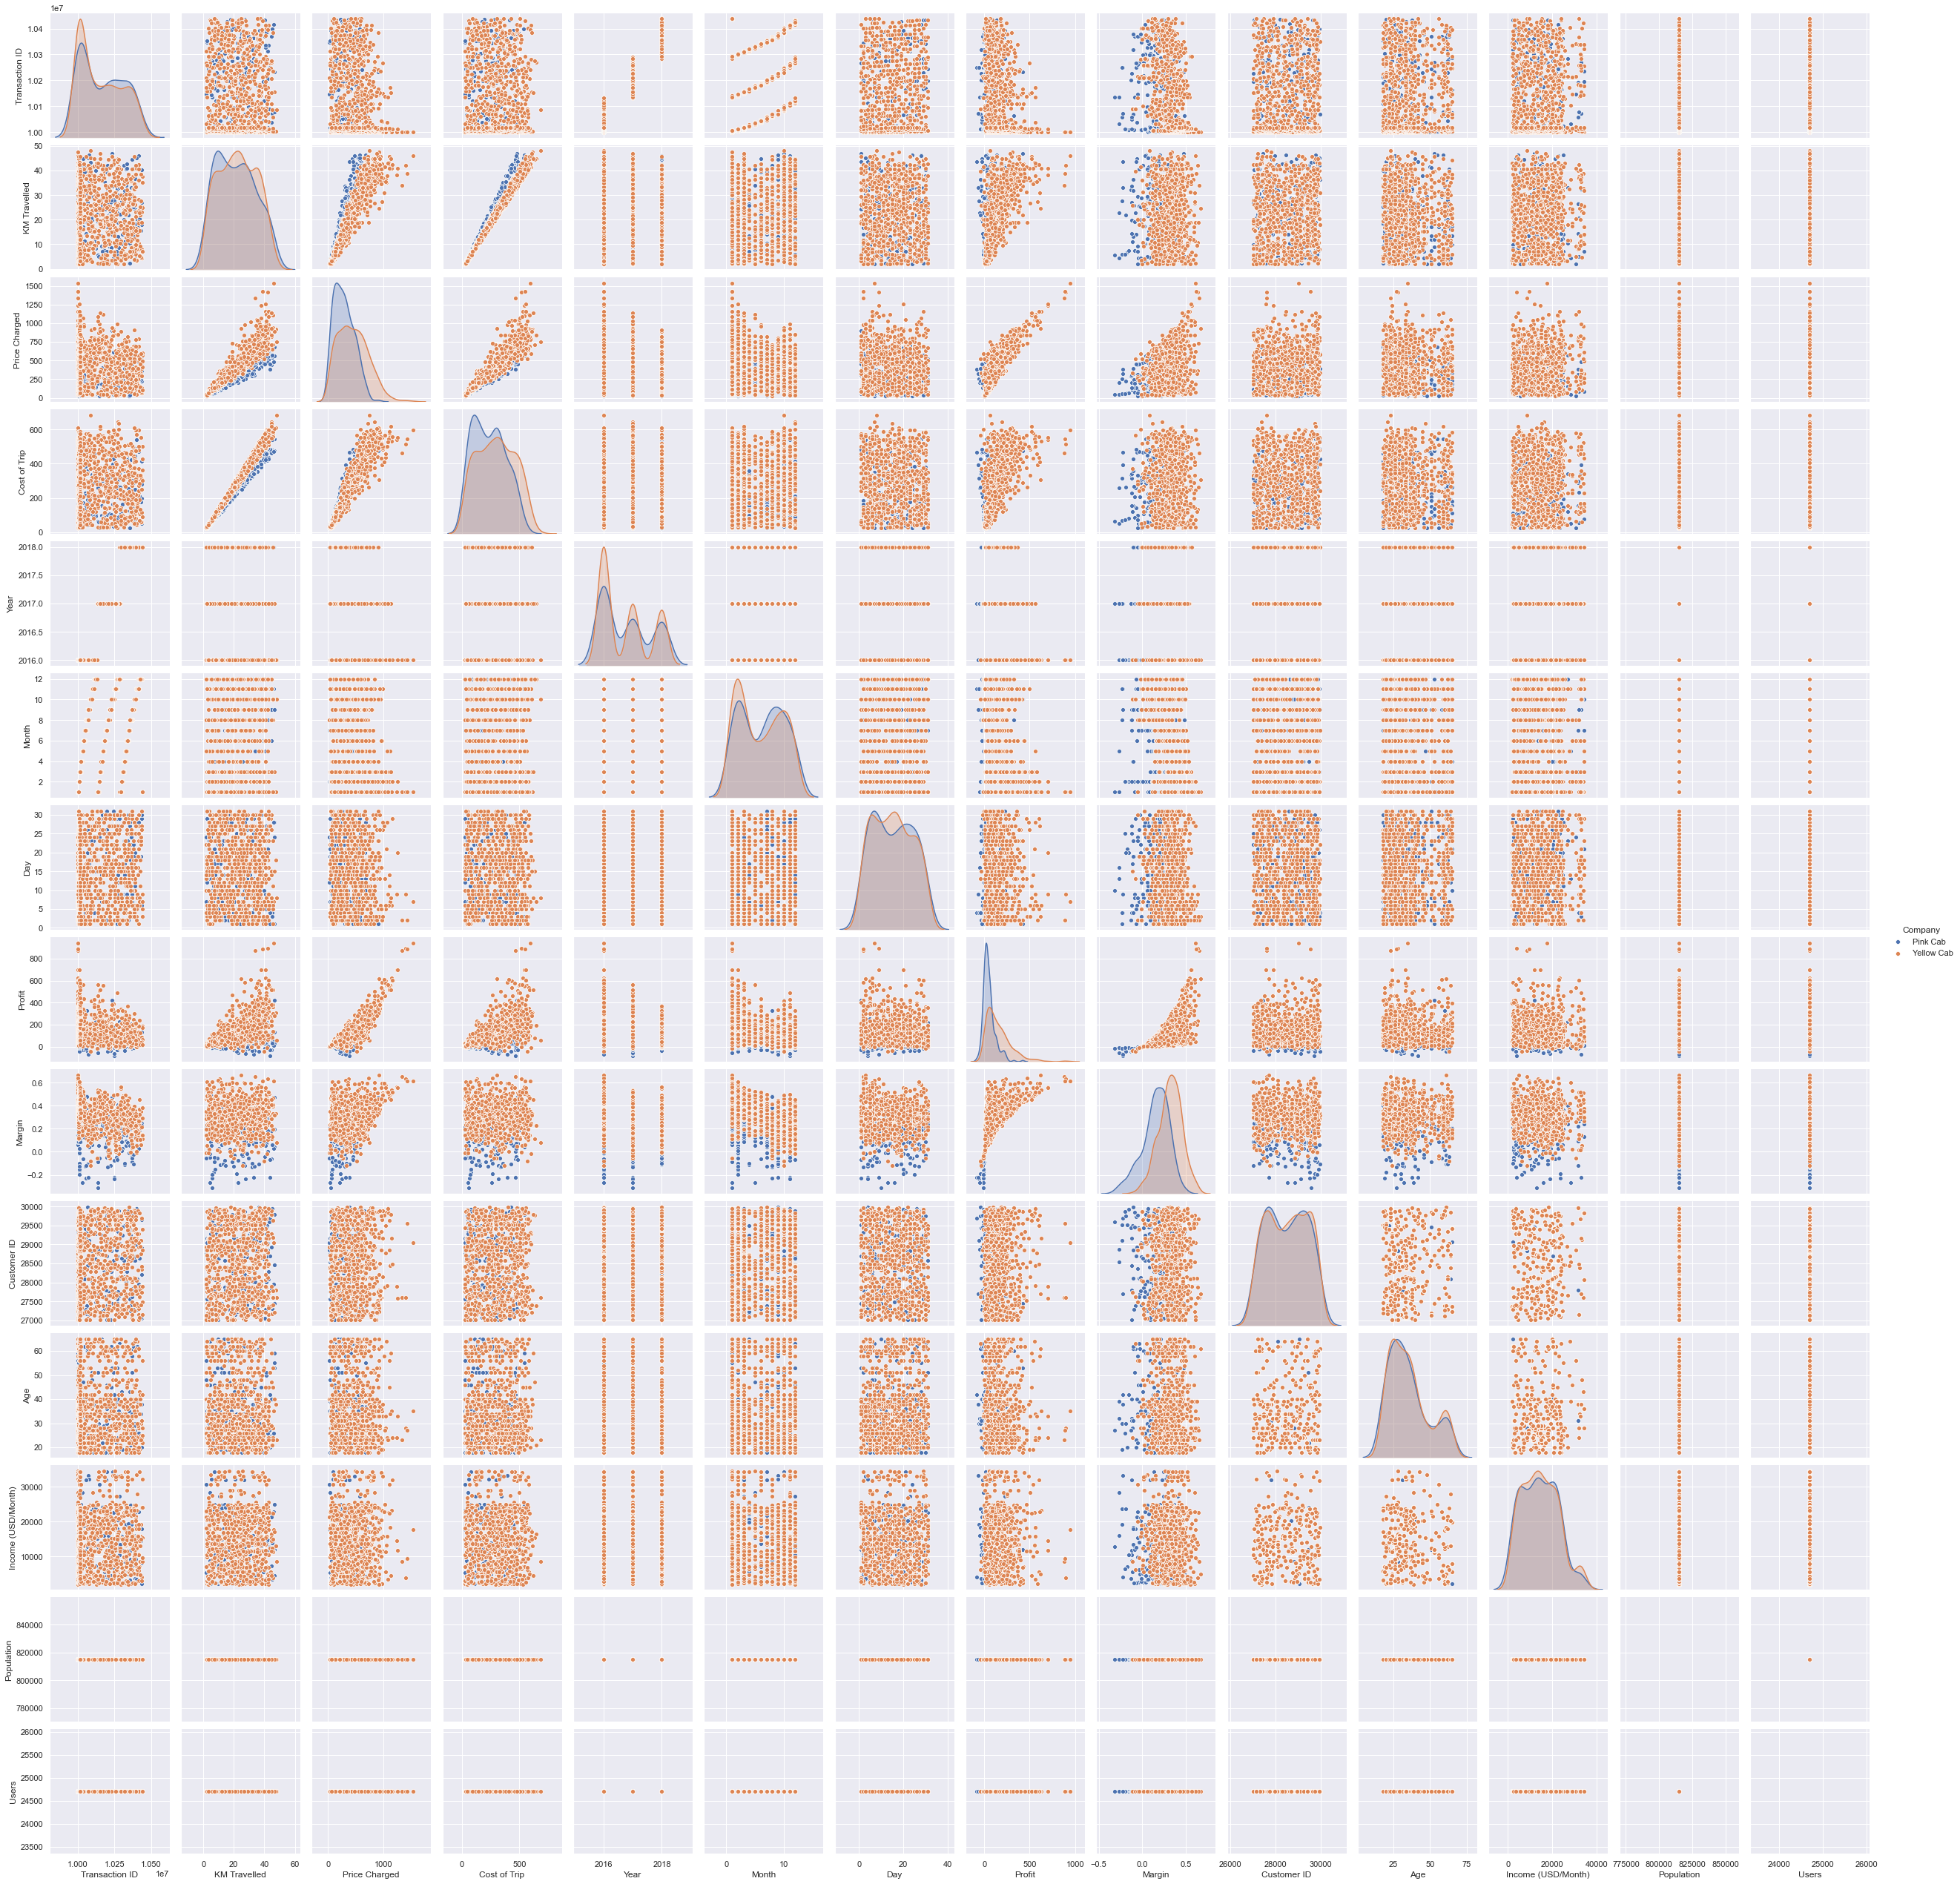

In [203]:
sns.pairplot(merged.head(1000), hue = 'Company')

In [204]:
data_corr = merged.corr()
data_corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Profit,Margin,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,0.941600,0.287009,0.012021,-0.087130,-0.094223,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,-0.001072,-0.001903,0.001652,0.462768,0.000081,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.036409,-0.061116,-0.004021,0.864154,0.439703,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,-0.001773,-0.008370,0.002091,0.486056,0.017494,0.003077,-0.000189,-0.000633,0.015108,0.023628
Year,0.941600,-0.001072,-0.036409,-0.001773,1.000000,-0.030490,-0.020995,-0.060567,-0.069544,-0.002539,-0.000579,-0.001617,0.000003,-0.000771
Month,0.287009,-0.001903,-0.061116,-0.008370,-0.030490,1.000000,0.041412,-0.096352,-0.098018,-0.044656,-0.002226,0.000322,0.064571,0.036558
Day,0.012021,0.001652,-0.004021,0.002091,-0.020995,0.041412,1.000000,-0.008942,-0.010880,0.000650,-0.001275,0.001860,0.000970,0.000514
Profit,-0.087130,0.462768,0.864154,0.486056,-0.060567,-0.096352,-0.008942,1.000000,0.735325,-0.306527,-0.005093,0.006148,0.544079,0.457758
Margin,-0.094223,0.000081,0.439703,0.017494,-0.069544,-0.098018,-0.010880,0.735325,1.000000,-0.371498,-0.006679,0.006952,0.642126,0.531486
Customer ID,-0.016912,0.000389,-0.177324,0.003077,-0.002539,-0.044656,0.000650,-0.306527,-0.371498,1.000000,-0.004735,-0.013608,-0.647052,-0.610742


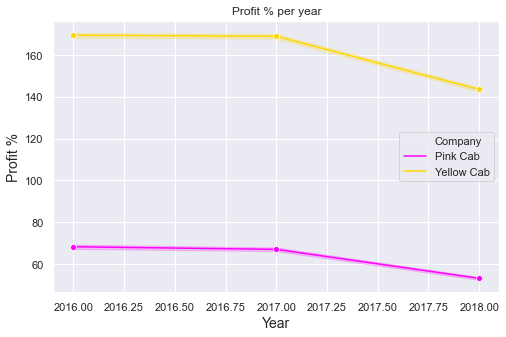

In [205]:
plt.figure(figsize = (8, 5))
sns.lineplot(x='Year', y='Profit', hue="Company", data=merged, palette=['magenta', 'gold'], marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

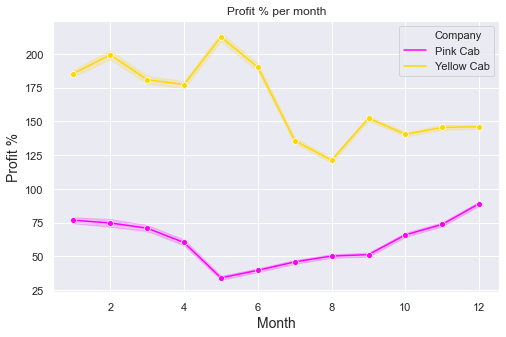

In [206]:
plt.figure(figsize = (8, 5))
sns.lineplot(x='Month', y='Profit', hue="Company", data=merged,palette=['magenta', 'gold'], marker='o' )
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

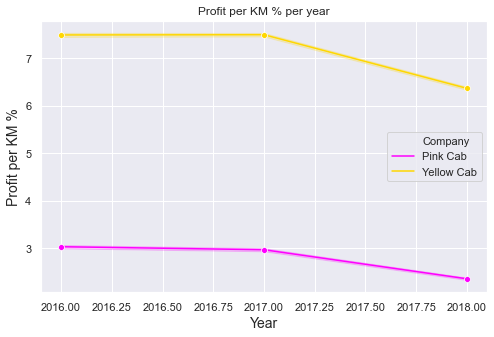

In [207]:
plt.figure(figsize = (8, 5))
sns.lineplot(x='Year', y='Profit per KM', hue="Company", data=cab_data, palette=['magenta', 'gold'], marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit per KM %", size=14)
plt.title("Profit per KM % per year")
plt.show()

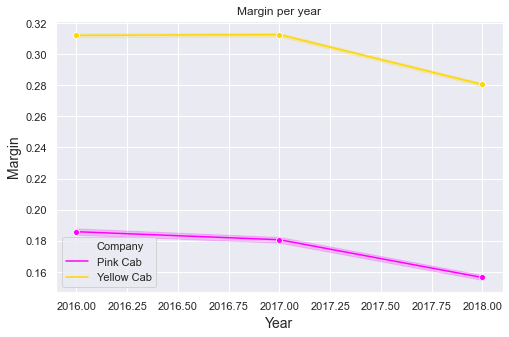

In [263]:
#hypothesis 0: Metropolitan cities provides better profit
plt.figure(figsize = (8, 5))
sns.lineplot(x='Year', y='Margin', hue="Company", data=cab_data, palette=['magenta', 'gold'], marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Margin", size=14)
plt.title("Margin per year")
plt.show()

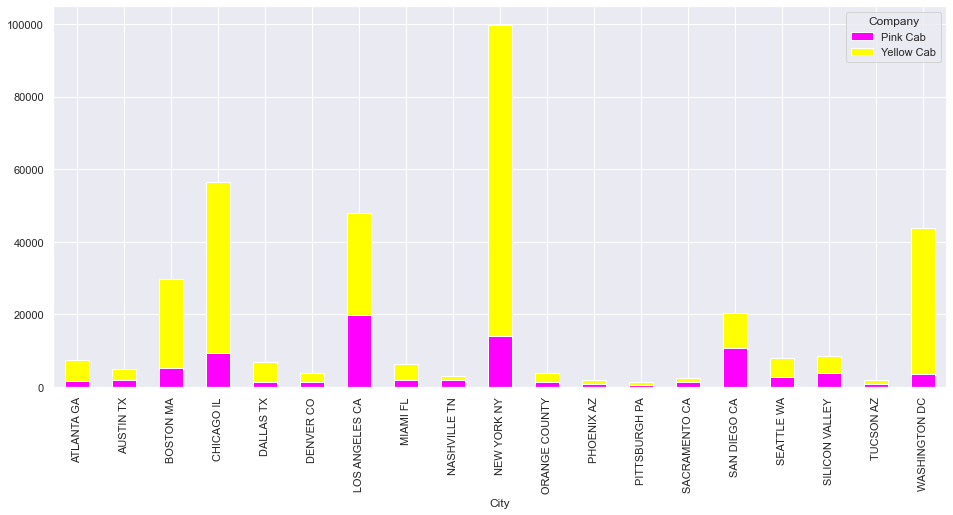

In [208]:
#hypothesis 3: Margin per year is better for Yellow Cab Company than Pink Cab Company
profitpercity=merged.groupby(by=['City','Company']).count()['Profit'].unstack("Company")
profitpercity.plot(kind="bar", figsize=(16,7),color=["magenta","yellow"],stacked=True)


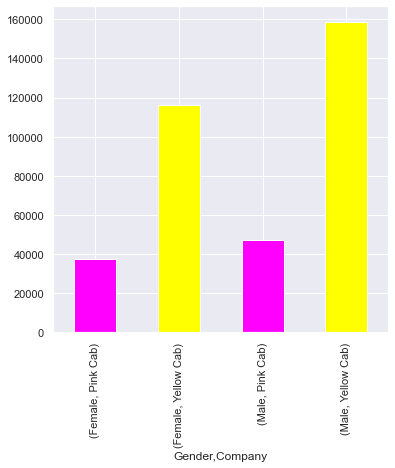

In [209]:
#hypothesis 1: male users occupy more cab companies
plt.figure(figsize = (7,4))
gender=merged.groupby(by=['Gender','Company']).count()['Users']
gender.plot(kind="bar", figsize=(6,6),color=["magenta","yellow"],stacked=True)


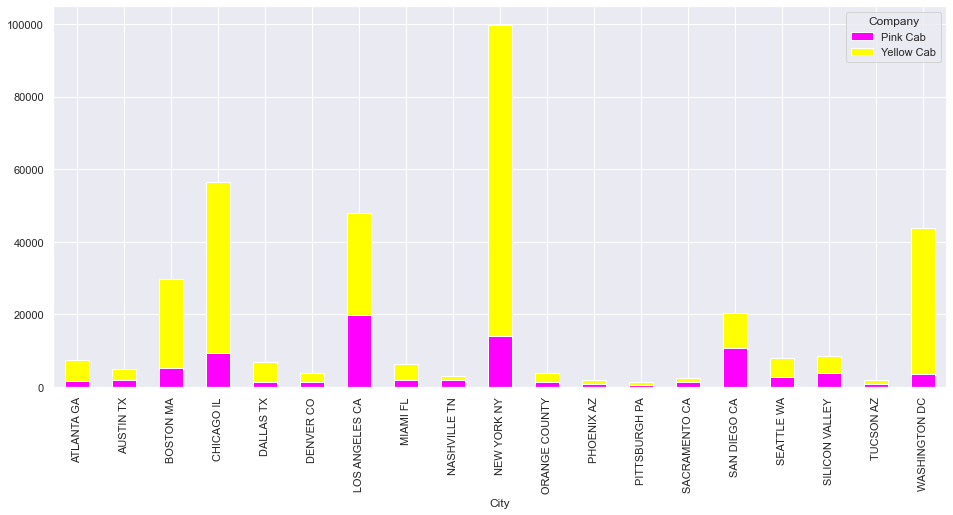

In [210]:
# hypothesis 2: Many of the users come from metropolitan cities
citypref=merged.groupby(by=['City','Company']).count()['Users'].unstack("Company")
citypref.plot(kind="bar", figsize=(16,7),color=["magenta","yellow"],stacked=True)

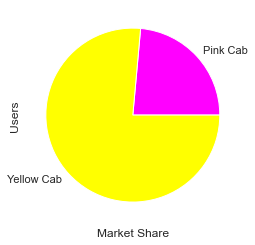

In [215]:
#hypothesis 4: Many of the users are from Yellow Cab
usersshare=merged.groupby(('Company'))
usersshare=usersshare.count()['Users']
plt.xlabel('Market Share')
usersshare.plot(kind="pie",colors=["magenta","yellow"])


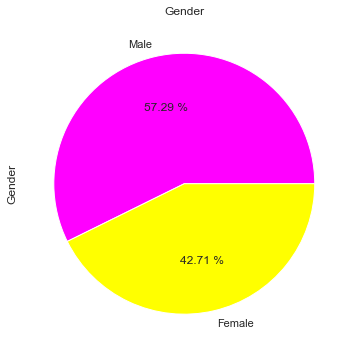

In [221]:
gendershare = merged['Gender'].value_counts().plot(kind='pie', autopct='%.2f %%',figsize=(6, 6), title='Gender',colors=["magenta","yellow"])


In [222]:
# Which company has maximum cab users at a particular time period?
#hypothesis 5: Yellow Cab Company has maximum cab users at a particular time period -per year-
# Grouping the dataframe to get the infomation of maximum users in both companies in yearly time periods. 
max_users = merged.groupby(['Year', "Company"])['Users'].sum()
max_users

Year  Company   
2016  Pink Cab      3.133196e+09
      Yellow Cab    1.383352e+10
2017  Pink Cab      3.826605e+09
      Yellow Cab    1.660516e+10
2018  Pink Cab      3.679122e+09
      Yellow Cab    1.583772e+10
Name: Users, dtype: float64

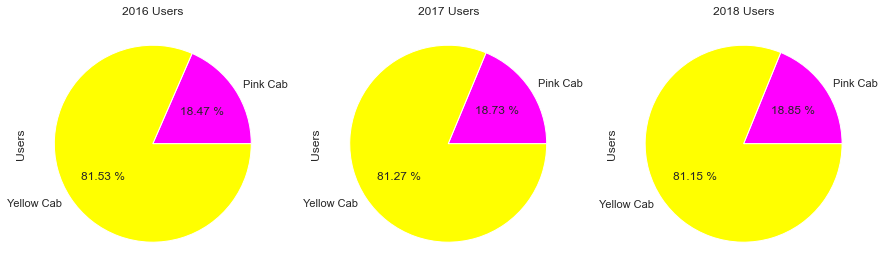

In [227]:
# Plotting the maximum users 
first_year = max_users.get(key=2016)
second_year = max_users.get(key=2017)
third_year = max_users.get(key=2018)

fig, axs = plt.subplots(1,3, figsize=(15,15))

first_year.plot(kind = 'pie', autopct='%.2f %%', title='2016 Users', ax=axs[0],colors=["magenta","yellow"])
second_year.plot(kind = 'pie', autopct='%.2f %%', title='2017 Users', ax=axs[1],colors=["magenta","yellow"])
third_year.plot(kind = 'pie', autopct='%.2f %%', title='2018 Users', ax=axs[2],colors=["magenta","yellow"])